In [4]:
import os
# os.environ['LC_ALL'] = 'en_US.UTF-8'
# os.environ['LANG'] = 'en_US.UTF-8'


In [1]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 8.3 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

In [3]:
model=YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 79.0MB/s]


In [5]:
!touch data.yaml

In [ ]:
model.train(data="/content/data.yaml",epochs=15)

In [ ]:
model.val()

In [13]:
best=YOLO("/content/runs/detect/train6/weights/best.pt")

In [49]:
predictions=best.predict("/content/drive/MyDrive/add256-main/test/images/apple-tree1.jpeg",save=True)


image 1/1 /content/drive/MyDrive/add256-main/test/images/apple-tree1.jpeg: 640x416 15 apples, 30.9ms
Speed: 2.3ms preprocess, 30.9ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 416)
Results saved to runs/detect/predict


In [50]:
type(predictions)

list

In [57]:
import cv2


0: 640x416 15 apples, 67.7ms
Speed: 2.2ms preprocess, 67.7ms inference, 16.4ms postprocess per image at shape (1, 3, 640, 416)


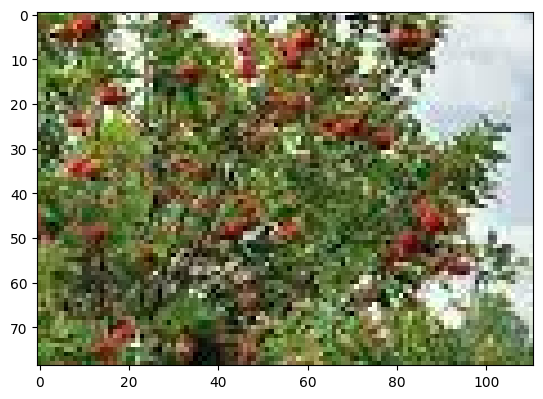

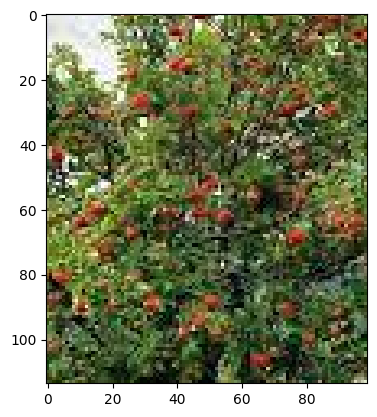

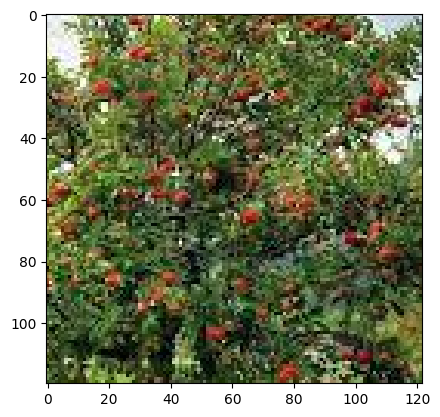

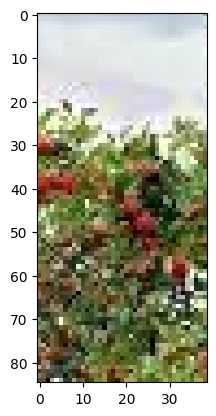

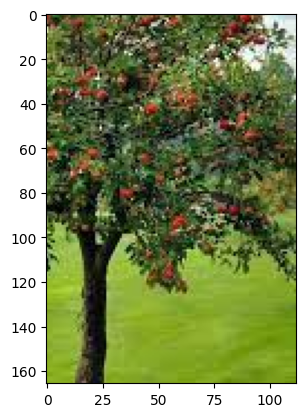

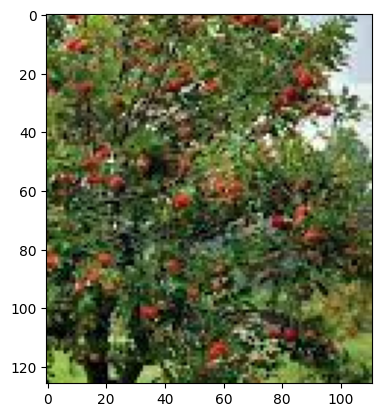

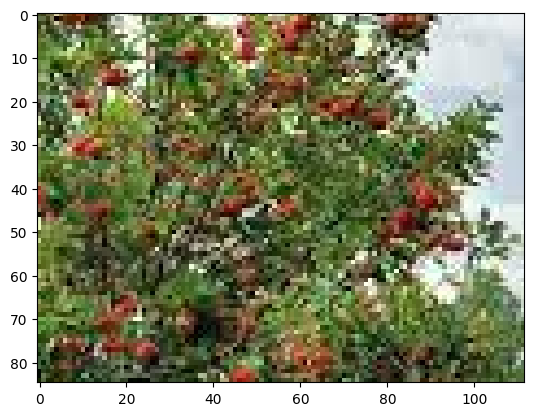

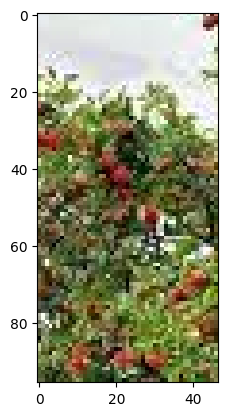

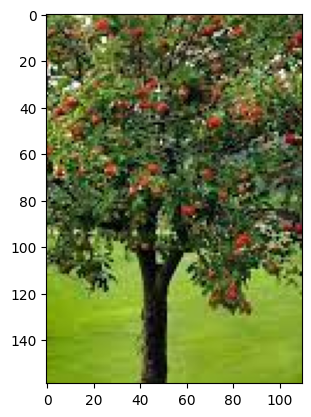

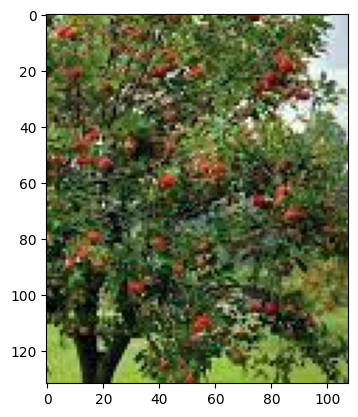

error: ignored

In [74]:
img = cv2.imread("/content/drive/MyDrive/add256-main/test/images/apple-tree1.jpeg")

# Predict the bounding box coordinates
results = model.predict(img)

# Crop the image using OpenCV
for r in results:
    for box in r.boxes:
      cx,cy,w,h = map(float,box.xyxy[0])
      x1 = cx - 0.5 * w
      y1 = cy - 0.5 * h
      x2 = cx + 0.5 * w
      y2 = cy + 0.5 * h

      head = img[int(y1):int(y2), int(x1):int(x2)]
      head = cv2.cvtColor(head, cv2.COLOR_BGR2RGB)
      plt.imshow(head)
      plt.show()

In [65]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("/content/drive/MyDrive/add256-main/test/images/apple-tree1.jpeg")

# Predict the bounding box coordinates
results = model.predict(img)

# Crop the image using OpenCV
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy
        head = img[y1:y2, x1:x2]
        head = cv2.cvtColor(head, cv2.COLOR_BGR2RGB)
        plt.imshow(head)
        plt.show()



0: 640x416 15 apples, 27.3ms
Speed: 2.7ms preprocess, 27.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 416)


ValueError: ignored

In [42]:
confidence_threshold = 0.5
apples = [box for box in predictions[0] if box[4] > confidence_threshold]

IndexError: ignored

In [16]:
from PIL import Image

In [20]:
img=Image.open("/content/drive/MyDrive/add256-main/test/images/apple-tree1.jpeg")

In [21]:
img=img.resize((256,256))

In [22]:
img.save("/content/drive/MyDrive/add256-main/test/images/test-1.jpg")